AxesImage(54,36;334.8x217.44)


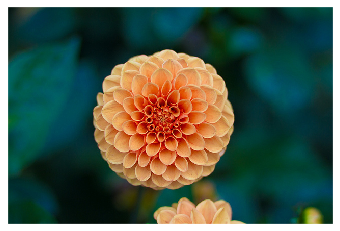

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax=plt.axes(xticks=[], yticks=[])
print(ax.imshow(china))

In [2]:
print(china.shape)

(427, 640, 3)


In [3]:
data=china/255 # use 0...1 scale
data = data.reshape(427*640,3)
print(data.shape)

(273280, 3)


In [0]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors=data

    # choose random subset
    rng = np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B=data[i].T

    fig, ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))

    ax[1].scatter(R,G,color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))

    print(fig.suptitle(title,size=20))

Text(0.5, 0.98, 'input color space: 16 million possible colors')


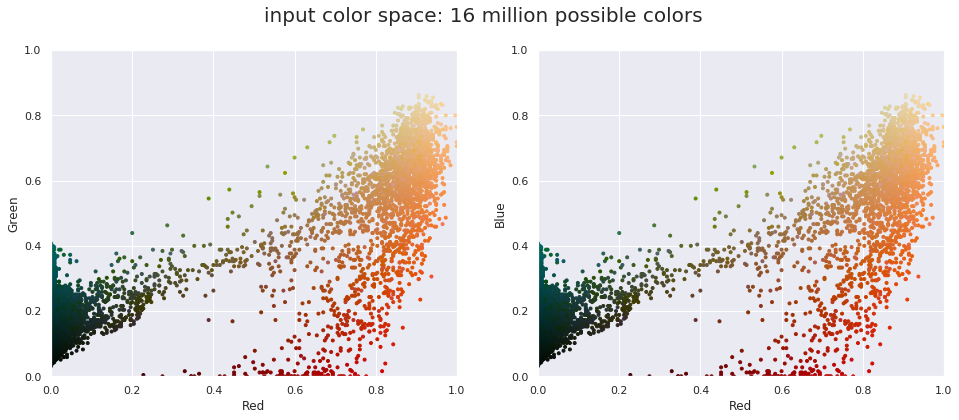

In [5]:
plot_pixels(data, title='input color space: 16 million possible colors')

Text(0.5, 0.98, 'reduced color space: 16 colors')


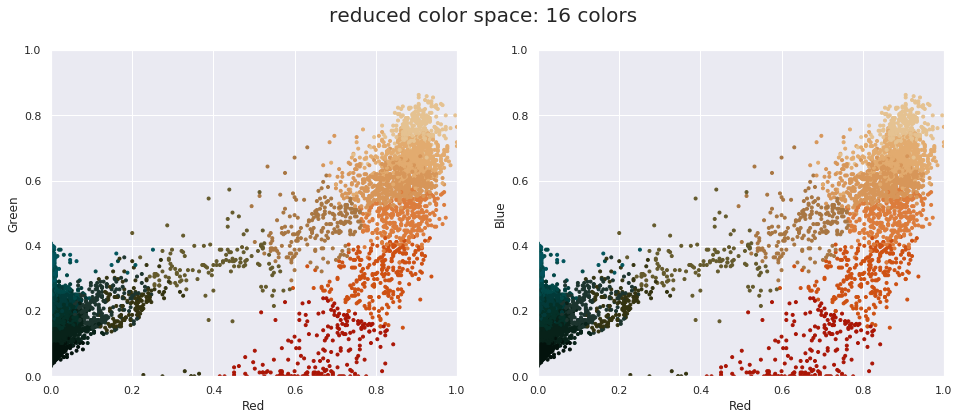

In [6]:
import warnings; warnings.simplefilter('ignore') #fix numpy issues
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title = "reduced color space: 16 colors")

In [0]:
china_recolored=new_colors.reshape(china.shape)

Text(0.5, 1.0, '16 color Image')

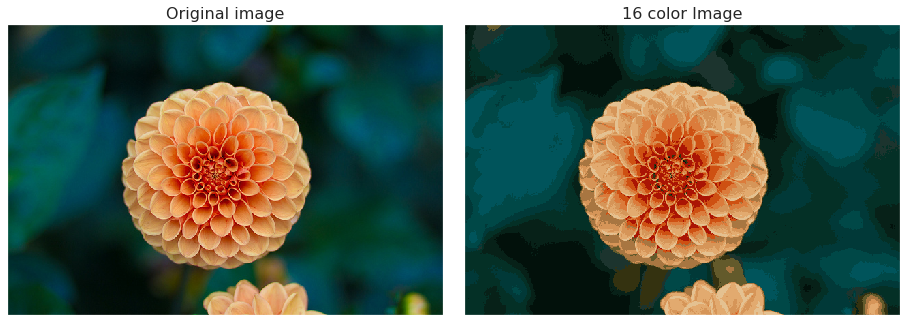

In [8]:
fig, ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 color Image', size=16)